# Employee Promotion Prediction

# This data contains the following attributes:

employee_id, department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met..80.
awards_won.
avg_training_score
is_promoted   ----> Target Variable

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing training dataset and test dataset

df_train = pd.read_csv('emp_train_dataset.csv')
df_test = pd.read_csv('emp_test_dataset.csv')

In [3]:
print("Shape of traning data - ", df_train.shape)
print("Shape of testing data - ", df_test.shape)


Shape of traning data -  (3956, 14)
Shape of testing data -  (108, 14)


In [4]:
# Concating the train data and test data together to process it simultaneously
df = pd.concat([df_train, df_test])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4064 entries, 0 to 107
Data columns (total 14 columns):
employee_id             4064 non-null int64
department              4063 non-null object
region                  4063 non-null object
education               3882 non-null object
gender                  4063 non-null object
recruitment_channel     4063 non-null object
no_of_trainings         4062 non-null float64
age                     4062 non-null float64
previous_year_rating    3760 non-null float64
length_of_service       4062 non-null float64
KPIs_met..80.           4062 non-null float64
awards_won.             4062 non-null float64
avg_training_score      4062 non-null float64
is_promoted             4062 non-null float64
dtypes: float64(8), int64(1), object(5)
memory usage: 476.2+ KB


In [6]:
print("Shape of dataset - ", df.shape)

Shape of dataset -  (4064, 14)


In [7]:
print(*df.columns, sep="\n")

employee_id
department
region
education
gender
recruitment_channel
no_of_trainings
age
previous_year_rating
length_of_service
KPIs_met..80.
awards_won.
avg_training_score
is_promoted


In [8]:
# Understanding data values
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,76419,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,42.0,4.0,4.0,1.0,0.0,48.0,0.0
1,53942,Technology,region_2,Below Secondary,f,other,2.0,24.0,3.0,2.0,0.0,0.0,77.0,0.0
2,60805,Sales & Marketing,region_16,Master's & above,m,other,2.0,36.0,3.0,7.0,0.0,0.0,50.0,0.0
3,65231,Legal,region_31,Bachelor's,m,other,1.0,33.0,3.0,6.0,0.0,0.0,54.0,0.0
4,70085,Technology,region_13,Master's & above,m,sourcing,1.0,42.0,4.0,4.0,0.0,0.0,79.0,0.0
5,68001,Procurement,region_20,Bachelor's,m,other,1.0,26.0,3.0,2.0,0.0,0.0,69.0,0.0
6,21695,Sales & Marketing,region_22,Master's & above,f,other,1.0,35.0,3.0,4.0,0.0,0.0,52.0,0.0
7,22837,Sales & Marketing,region_26,Master's & above,m,sourcing,1.0,51.0,2.0,2.0,0.0,0.0,46.0,0.0
8,60467,Operations,region_13,Master's & above,m,sourcing,1.0,41.0,5.0,19.0,0.0,0.0,60.0,0.0
9,12451,Finance,region_2,Master's & above,f,other,1.0,55.0,3.0,10.0,0.0,0.0,61.0,0.0


In [9]:
df.describe(include=("all"))

# Performing basic check on data for count values

In [10]:
df.is_promoted.value_counts()

0.0    3720
1.0     342
Name: is_promoted, dtype: int64

In [11]:
df.is_promoted.value_counts(normalize=True)

0.0    0.915805
1.0    0.084195
Name: is_promoted, dtype: float64

C:\Users\piyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


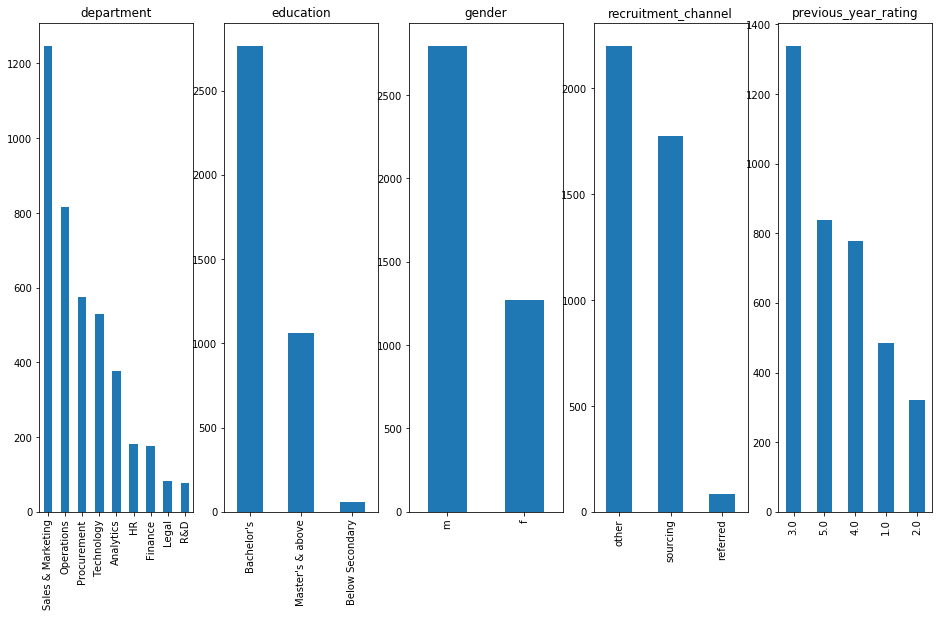

In [12]:
categorical_features = ["department", "education", "gender", "recruitment_channel", "previous_year_rating", ]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot("bar", ax=ax[i], figsize=(16,9)).set_title(categorical_feature)
fig.show()

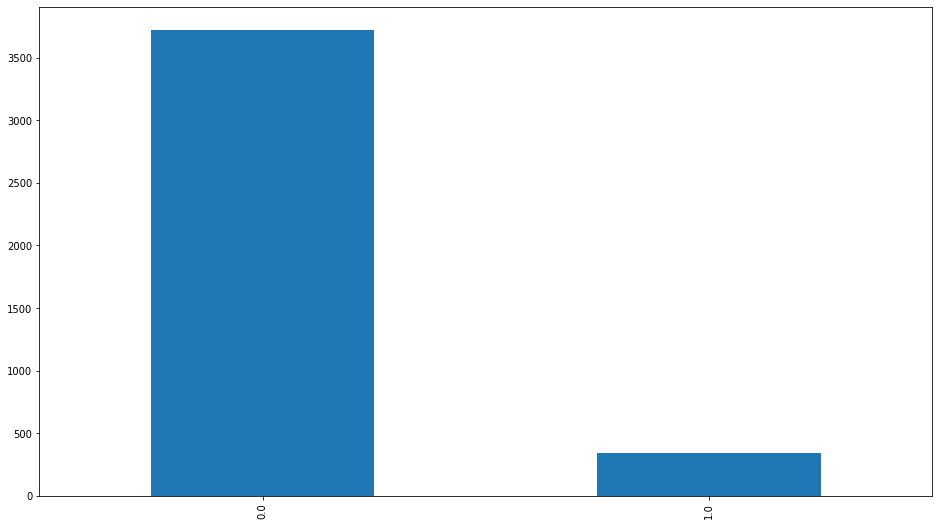

In [13]:
df['is_promoted'].value_counts().plot(kind='bar', figsize=(16,9))

Promoted proportion is around 8.4%. We can use k-fold cross valiation to deal with such kind of data.

### Treating Missing Values

In [14]:
df.isnull().sum()

employee_id               0
department                1
region                    1
education               182
gender                    1
recruitment_channel       1
no_of_trainings           2
age                       2
previous_year_rating    304
length_of_service         2
KPIs_met..80.             2
awards_won.               2
avg_training_score        2
is_promoted               2
dtype: int64

The missing values are present mostly in education and previous_year_rating. We will find out the lenght_of_service for all employees for which the previous_year_rating is missing. This is important to impute these values correctly.

In [15]:
df.isnull().sum().sum()/len(df)

0.12401574803149606

In the data set,total missing values is around 12.5%


In [16]:
df_null_rate = df[df['previous_year_rating'].isnull()]
df_null_rate.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
10,32671,HR,region_31,Bachelor's,m,other,1.0,27.0,NaN,1.0,0.0,0.0,50.0,0.0
23,46373,Operations,region_2,Below Secondary,m,sourcing,1.0,22.0,NaN,1.0,0.0,0.0,59.0,0.0
31,33732,Sales & Marketing,region_6,Bachelor's,m,other,1.0,32.0,NaN,1.0,0.0,0.0,48.0,0.0
32,56281,Sales & Marketing,region_34,Bachelor's,m,other,1.0,28.0,NaN,1.0,0.0,0.0,54.0,0.0
48,14441,Sales & Marketing,region_15,Bachelor's,m,sourcing,1.0,27.0,NaN,1.0,0.0,0.0,48.0,0.0


In [17]:
df_null_rate['length_of_service'].value_counts()

1.0    302
Name: length_of_service, dtype: int64

Since the length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits with 1 year experience. So they may not be having the previous year rating.We impute 0 for the null values.

In [18]:
df['previous_year_rating'].fillna(value=0,inplace=True)

In [19]:
# Recheck the missing values
df.isnull().sum()

employee_id               0
department                1
region                    1
education               182
gender                    1
recruitment_channel       1
no_of_trainings           2
age                       2
previous_year_rating      0
length_of_service         2
KPIs_met..80.             2
awards_won.               2
avg_training_score        2
is_promoted               2
dtype: int64

In [20]:
df.rename(columns={'KPIs_met..80.': 'KPIs_met >80%', 'awards_won.': 'awards_won?'}, inplace=True)

In [21]:
for i in df[df['education'].isnull()]['KPIs_met >80%']==0:
    df['education'].fillna(value="Bachelor's",inplace=True)

In [22]:
for i in df[df['education'].isnull()]['KPIs_met >80%']==1:
    df['education'].fillna(value="Master's & above",inplace=True)

In [23]:
df['education'].isnull().sum()

0

In [24]:
df.dropna(subset=['age'], inplace=True)
df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

'employee_id' column is not required, lets remove that

In [25]:
df.drop(['employee_id'],axis=1,inplace=True)

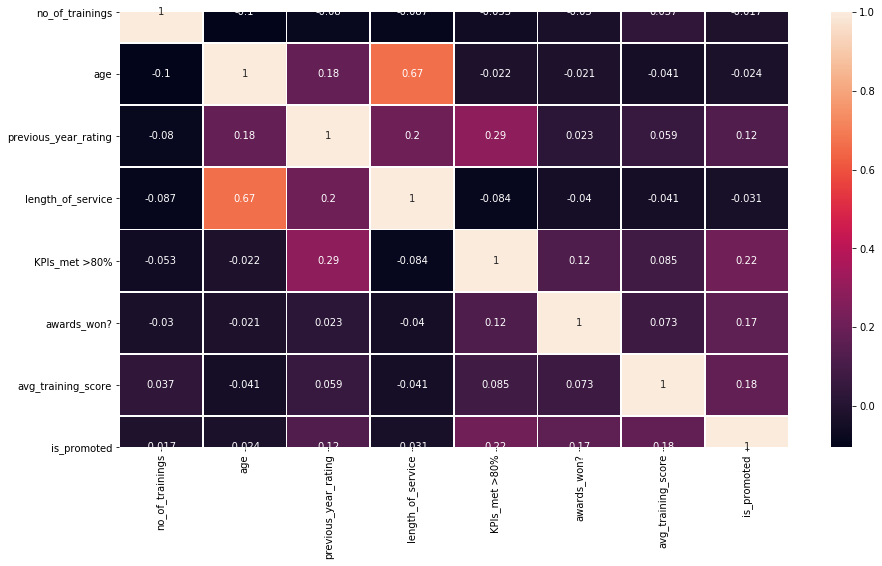

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=0.8)
plt.show()

Here previous_year_rating,KPIs_met>80%,awards_won? and avg_training_score are highly correlated with the target variable i.e is_promoted.

Length of the service and age are highly correlated with each other

In [27]:
# Encoding the categorical values
df_new=pd.get_dummies(df,['department','region','education','gender','recruitment_channel'],drop_first=True)

In [28]:
df_new.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,42.0,4.0,4.0,1.0,0.0,48.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,2.0,24.0,3.0,2.0,0.0,0.0,77.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,36.0,3.0,7.0,0.0,0.0,50.0,0.0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,33.0,3.0,6.0,0.0,0.0,54.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,42.0,4.0,4.0,0.0,0.0,79.0,0.0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [29]:
# Splitting the concatenated data into train and test again

df_train = df_new.iloc[:3956, :]
df_test = df_new.iloc[3956:, :]

print("Shape of processed traning data - ", df_train.shape)
print("Shape of processed testing data - ", df_test.shape)


Shape of processed traning data -  (3956, 54)
Shape of processed testing data -  (106, 54)


In [30]:
df_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,42.0,4.0,4.0,1.0,0.0,48.0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,2.0,24.0,3.0,2.0,0.0,0.0,77.0,0.0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2.0,36.0,3.0,7.0,0.0,0.0,50.0,0.0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,1.0,33.0,3.0,6.0,0.0,0.0,54.0,0.0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.0,42.0,4.0,4.0,0.0,0.0,79.0,0.0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [31]:
# One last check for null values
df_train.isnull().sum().sum()

0

In [32]:
# Separating features and target 

df_train_feat = df_train.drop('is_promoted', 1)
df_train_class = df_train['is_promoted']

# Model selection and training

We will try with nultiple models and analyse their performance.

In [33]:
# Splitting the data into training data and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(df_train_feat, df_train_class, test_size=0.2, random_state=0)

In [34]:
# SVM Classifier
# Logistic Regression
# KNN
# Random Forest
# Decision Tree 

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knn',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'rfc',
    DecisionTreeClassifier(random_state=0):'dtc'}
for model in model_dict:
    model.fit(X_train, y_train)
    pred_c=model.predict(X_test)
    accc=accuracy_score(y_test, pred_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))

Accuracy score:  svc  -  0.9
Accuracy score:  lr  -  0.91
Accuracy score:  knn  -  0.91
Accuracy score:  rfc  -  0.9
Accuracy score:  dtc  -  0.9


### Clearly logistic regression gave better accuracy.

Lets test this with K-fold cross validation because it gives better results. he mean of these K scores is consider as the ultimate accuracy score for the model.


In [35]:
from sklearn.model_selection import cross_val_score
for model in model_dict:
    score=cross_val_score(model,df_train_feat,df_train_class, cv=10)
    print("Accuracy score for model - ", model_dict[model], "with cross validation is ",'{:3.2f}'.format(score.mean()))

Accuracy score for model -  svc with cross validation is  0.92
Accuracy score for model -  lr with cross validation is  0.93
Accuracy score for model -  knn with cross validation is  0.92
Accuracy score for model -  rfc with cross validation is  0.92
Accuracy score for model -  dtc with cross validation is  0.89


## Evaluation metric the model

We use model evaluation metric like confusion matrix, precision, recall, F1 score, and AUR-ROC curve. We will analyse the performance of each model one by one.
 

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knn',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'rfc',
    DecisionTreeClassifier(random_state=0):'dtc'}
for model in model_dict:
    model.fit(X_train, y_train)
    pred_c=model.predict(X_test)
    accc=accuracy_score(y_test, pred_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))
    print ("The confusion Matrix for model:{} \n\n".format(model_dict[model]))
    print (confusion_matrix(y_test, pred_c), '\n')
    print (classification_report(y_test, pred_c))

Accuracy score:  svc  -  0.9
The confusion Matrix for model:svc 


[[714   0]
 [ 78   0]] 

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95       714
         1.0       0.00      0.00      0.00        78

    accuracy                           0.90       792
   macro avg       0.45      0.50      0.47       792
weighted avg       0.81      0.90      0.85       792



C:\Users\piyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy score:  lr  -  0.91
The confusion Matrix for model:lr 


[[714   0]
 [ 69   9]] 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       714
         1.0       1.00      0.12      0.21        78

    accuracy                           0.91       792
   macro avg       0.96      0.56      0.58       792
weighted avg       0.92      0.91      0.88       792

Accuracy score:  knn  -  0.91
The confusion Matrix for model:knn 


[[714   0]
 [ 74   4]] 

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       714
         1.0       1.00      0.05      0.10        78

    accuracy                           0.91       792
   macro avg       0.95      0.53      0.52       792
weighted avg       0.92      0.91      0.87       792

Accuracy score:  rfc  -  0.9
The confusion Matrix for model:rfc 


[[714   0]
 [ 78   0]] 

              precision    recall  f1-score   support

         0.0   

C:\Users\piyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


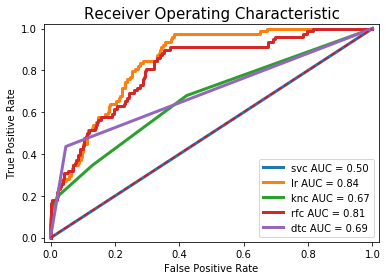

In [37]:
from sklearn.metrics import roc_curve, auc
model_dict={SVC(kernel="rbf", C=1, gamma=1000, probability=True):"svc",
    LogisticRegression(solver="liblinear", random_state=0):"lr",
    KNeighborsClassifier(n_neighbors=10):'knc',
    RandomForestClassifier(max_depth=3, n_estimators=100):'rfc',
    DecisionTreeClassifier():'dtc'}
for model in model_dict:
    model.fit(X_train,y_train)
    prob=model.predict_proba(X_test)
    fpr, tpr, thresholds=roc_curve(y_test, prob[:,1])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=model_dict[model]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('Receiver Operating Characteristic', fontsize=15)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.rcParams["figure.figsize"] = (17,12)
plt.show()

The Performance of Logistic regression is better than other models.

# Prediction on Test Data

In [38]:
df_test_feat = df_test.drop('is_promoted', 1)
df_test_class = df_test['is_promoted']

df_test_feat.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
1,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
5,1.0,31.0,3.0,5.0,0.0,0.0,59.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df_test_class.value_counts()

0.0    89
1.0    17
Name: is_promoted, dtype: int64

In [40]:
# Predicting the test values

for model in model_dict:
    pred_tst_c=model.predict(df_test_feat)
    accc=accuracy_score(df_test_class, pred_tst_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))
    print ("The confusion Matrix for model:{} \n\n".format(model_dict[model]))
    print (confusion_matrix(df_test_class, pred_tst_c), '\n')
    print (classification_report(df_test_class, pred_tst_c))

Accuracy score:  svc  -  0.84
The confusion Matrix for model:svc 


[[89  0]
 [17  0]] 

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        89
         1.0       0.00      0.00      0.00        17

    accuracy                           0.84       106
   macro avg       0.42      0.50      0.46       106
weighted avg       0.70      0.84      0.77       106

Accuracy score:  lr  -  0.85
The confusion Matrix for model:lr 


[[89  0]
 [16  1]] 

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92        89
         1.0       1.00      0.06      0.11        17

    accuracy                           0.85       106
   macro avg       0.92      0.53      0.51       106
weighted avg       0.87      0.85      0.79       106

Accuracy score:  knc  -  0.85
The confusion Matrix for model:knc 


[[89  0]
 [16  1]] 

              precision    recall  f1-score   support

         0.0       0.85   

C:\Users\piyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\piyu\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
for model in model_dict:
    pred_c=model.predict(df_test_feat)
    accc=accuracy_score(df_test_class, pred_c)
    print("Accuracy score: ", model_dict[model], " - ", accc.round(2))

Accuracy score:  svc  -  0.84
Accuracy score:  lr  -  0.85
Accuracy score:  knc  -  0.85
Accuracy score:  rfc  -  0.84
Accuracy score:  dtc  -  0.82


In [42]:
# Prediction with k_fold cross-validation 
for model in model_dict:
    score=cross_val_score(model,df_test_feat,df_test_class, cv=10)
    print("Accuracy score for model - ", model_dict[model], "with cross validation is ",'{:3.2f}'.format(score.mean()))

Accuracy score for model -  svc with cross validation is  0.84
Accuracy score for model -  lr with cross validation is  0.86
Accuracy score for model -  knc with cross validation is  0.84
Accuracy score for model -  rfc with cross validation is  0.84
Accuracy score for model -  dtc with cross validation is  0.74


Clearly the logistic regression outperforms other models.